In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import networkx as nx
import time
from math import sqrt
import random
import numpy as np
import heapq, math
from typing import List, Tuple, Optional, Dict, Any
import math
import heapq
from collections import defaultdict, deque

In [2]:
#Load dataset
df_lb = pd.read_csv("lb_road_data.csv")

In [3]:
df_lb

,start_node,end_node,street_name,road_direction,distance_meters,speed_limit_kph,duration_seconds,road_class,road_type,is_blocked,is_dead_end
0,"(14.153439, 121.248028)","(14.155045, 121.250268)",unnamed road,twoway,300,30,36.00,tertiary,asphalt,0,0
1,"(14.153439, 121.248028)","(14.153306, 121.248118)",unnamed road,twoway,18,30,2.16,tertiary,asphalt,0,0
2,"(14.153306, 121.248118)","(14.153336, 121.249875)",unnamed road,twoway,190,30,22.80,tertiary,asphalt,0,0
3,"(14.153336, 121.249875)","(14.153071, 121.250281)",unnamed road,twoway,54,30,6.48,tertiary,asphalt,0,0
4,"(14.153071, 121.250281)","(14.153597, 121.250329)",unnamed road,twoway,59,30,7.08,tertiary,asphalt,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1939,"(14.165493, 121.236500)","(14.165484, 121.237079)",Melanio A. Gadup,twoway,64,45,5.12,tertiary,asphalt,0,0
1940,"(14.165484, 121.237079)","(14.165477, 121.237474)",Melanio A. Gadup,twoway,44,45,3.52,tertiary,asphalt,0,0
1941,"(14.165477, 121.237474)","(14.165484, 121.237800)",Melanio A. Gadup,twoway,34,45,2.72,tertiary,asphalt,0,0
1942,"(14.165484, 121.237800)","(14.165473, 121.237994)",Melanio A. Gadup,twoway,21,45,1.68,tertiary,asphalt,0,0


In [4]:
# Drop unnecesarry columsn
df = df_lb.drop(columns=['street_name', 'road_class', 'road_type'])

In [5]:
df

,start_node,end_node,road_direction,distance_meters,speed_limit_kph,duration_seconds,is_blocked,is_dead_end
0,"(14.153439, 121.248028)","(14.155045, 121.250268)",twoway,300,30,36.00,0,0
1,"(14.153439, 121.248028)","(14.153306, 121.248118)",twoway,18,30,2.16,0,0
2,"(14.153306, 121.248118)","(14.153336, 121.249875)",twoway,190,30,22.80,0,0
3,"(14.153336, 121.249875)","(14.153071, 121.250281)",twoway,54,30,6.48,0,0
4,"(14.153071, 121.250281)","(14.153597, 121.250329)",twoway,59,30,7.08,0,0
...,...,...,...,...,...,...,...,...
1939,"(14.165493, 121.236500)","(14.165484, 121.237079)",twoway,64,45,5.12,0,0
1940,"(14.165484, 121.237079)","(14.165477, 121.237474)",twoway,44,45,3.52,0,0
1941,"(14.165477, 121.237474)","(14.165484, 121.237800)",twoway,34,45,2.72,0,0
1942,"(14.165484, 121.237800)","(14.165473, 121.237994)",twoway,21,45,1.68,0,0


/tmp/ipython-input-829589216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='speed_limit_kph', palette='dark')


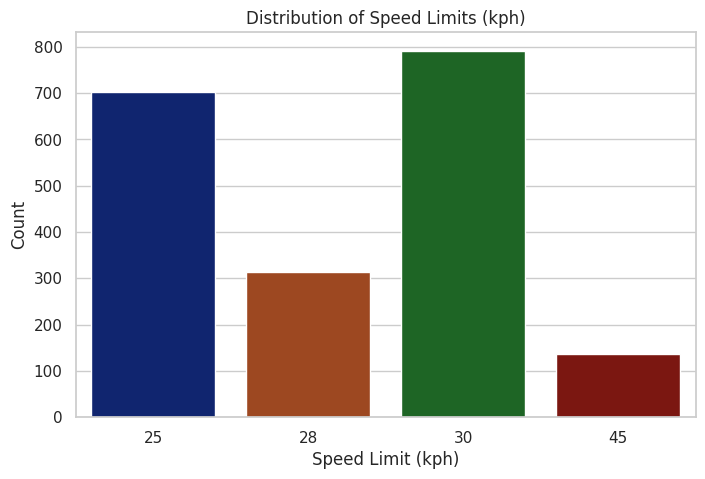

In [6]:
# Data Visualization
sns.set_theme(style="whitegrid")

# 1.)Speed Limit Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='speed_limit_kph', palette='dark')
plt.title('Distribution of Speed Limits (kph)')
plt.xlabel('Speed Limit (kph)')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-4131613534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_blocked', palette='dark')


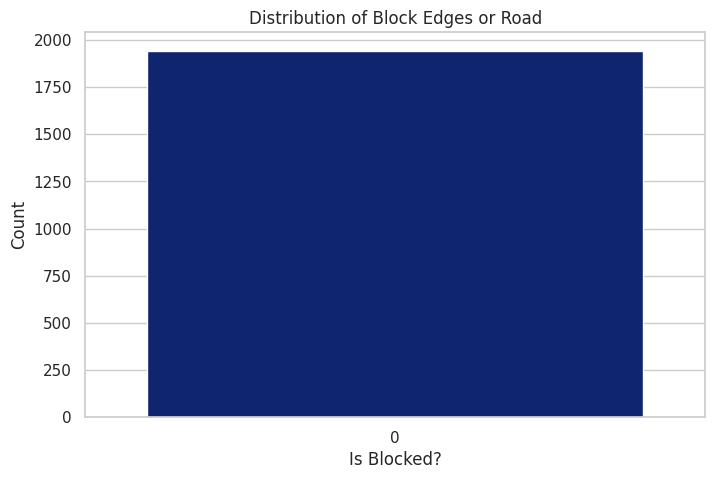

In [7]:
# 2.)Block edges Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_blocked', palette='dark')
plt.title('Distribution of Block Edges or Road')
plt.xlabel('Is Blocked?')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3510043901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_dead_end', palette='dark')


Text(0, 0.5, 'Count')

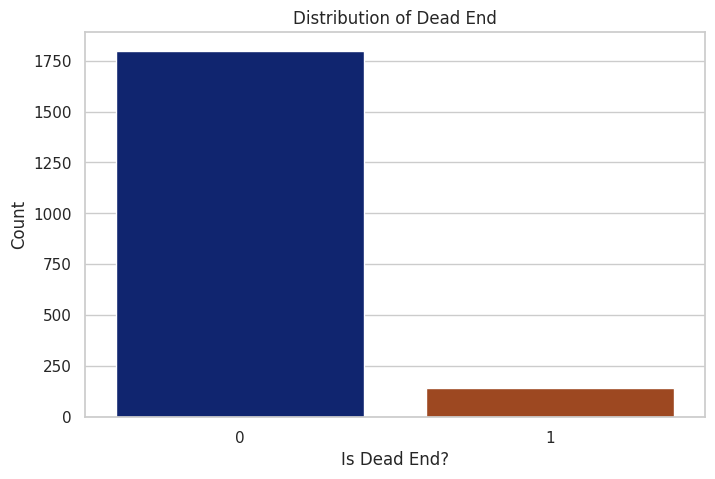

In [8]:
# 3.)Dead End Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_dead_end', palette='dark')
plt.title('Distribution of Dead End')
plt.xlabel('Is Dead End?')
plt.ylabel('Count')

/tmp/ipython-input-1057217371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='road_direction', palette='dark')


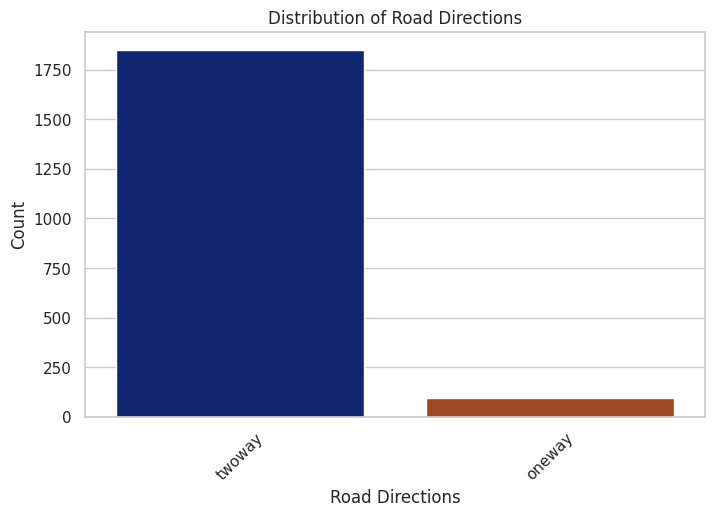

In [9]:
# 4.)Road Direction Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='road_direction', palette='dark')
plt.title('Distribution of Road Directions')
plt.xlabel('Road Directions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2682136494.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['distance_meters'], bins=50, palette='dark', edgecolor='black')


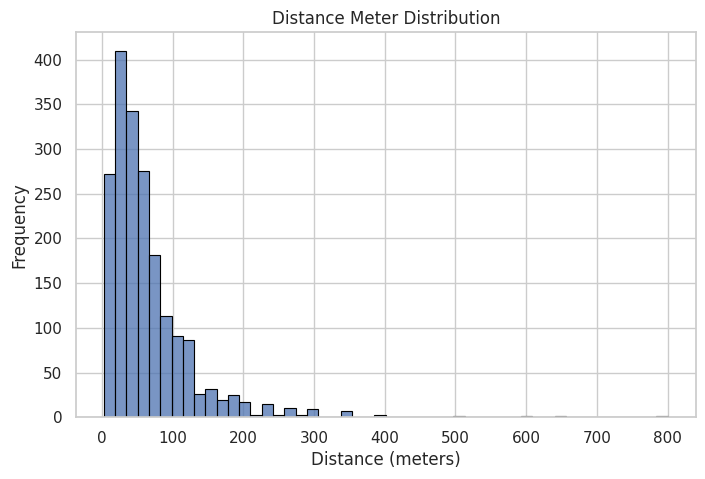

In [10]:
# 4.)Distance Meter Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['distance_meters'], bins=50, palette='dark', edgecolor='black')
plt.title('Distance Meter Distribution')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.grid(True, alpha=1)
plt.show()

/tmp/ipython-input-3395397573.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['duration_seconds'], bins=50, palette='dark', edgecolor='black')


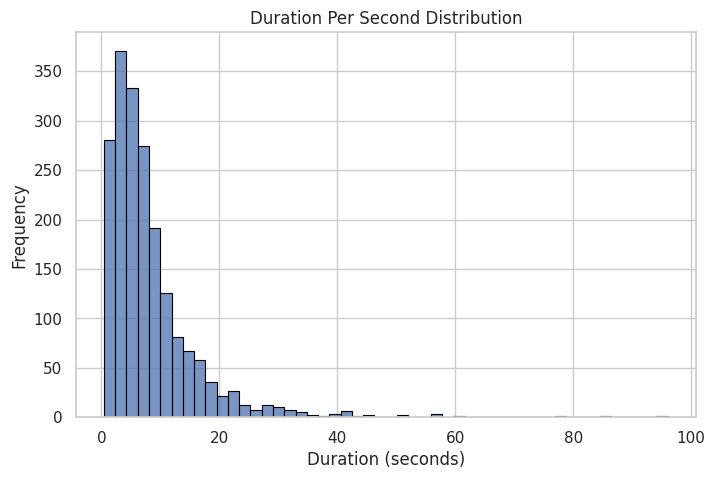

In [11]:
# 5.)Distance per Second Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['duration_seconds'], bins=50, palette='dark', edgecolor='black')
plt.title('Duration Per Second Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True, alpha=1)
plt.show()

In [12]:
# Prepare the data for modeling
# Convert categorical variables to numerical ones
df['road_direction'] = df['road_direction'].map({'oneway': 0, 'twoway': 1})

# Extract latitude and longitude from start_node and end_node
def extract_coords(coord_str):
    lat, lon = coord_str.strip('()').split(',')
    return float(lat), float(lon)

df['start_lat'], df['start_lon'] = zip(*df['start_node'].apply(extract_coords))
df['end_lat'], df['end_lon'] = zip(*df['end_node'].apply(extract_coords))

# Features and target
X = df[['distance_meters', 'speed_limit_kph', 'is_blocked', 'is_dead_end']]
y = df['duration_seconds']

# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 1555
Test size: 389


In [13]:
df.head()

,start_node,end_node,road_direction,distance_meters,speed_limit_kph,duration_seconds,is_blocked,is_dead_end,start_lat,start_lon,end_lat,end_lon
0,"(14.153439, 121.248028)","(14.155045, 121.250268)",1,300,30,36.00,0,0,14.153439,121.248028,14.155045,121.250268
1,"(14.153439, 121.248028)","(14.153306, 121.248118)",1,18,30,2.16,0,0,14.153439,121.248028,14.153306,121.248118
2,"(14.153306, 121.248118)","(14.153336, 121.249875)",1,190,30,22.80,0,0,14.153306,121.248118,14.153336,121.249875
3,"(14.153336, 121.249875)","(14.153071, 121.250281)",1,54,30,6.48,0,0,14.153336,121.249875,14.153071,121.250281
4,"(14.153071, 121.250281)","(14.153597, 121.250329)",1,59,30,7.08,0,0,14.153071,121.250281,14.153597,121.250329


    Algorithm  Path Cost  Execution Time (s)  Path Length  Travel Time (min)
0    Dijkstra   1611.240            0.003560           52           8.420000
1          A*   1611.240            0.005871           52           8.420000
2  Greedy BFS   1987.044            0.000451           66          10.596286
3  Ant Colony   1621.224            0.983809           51           8.472000


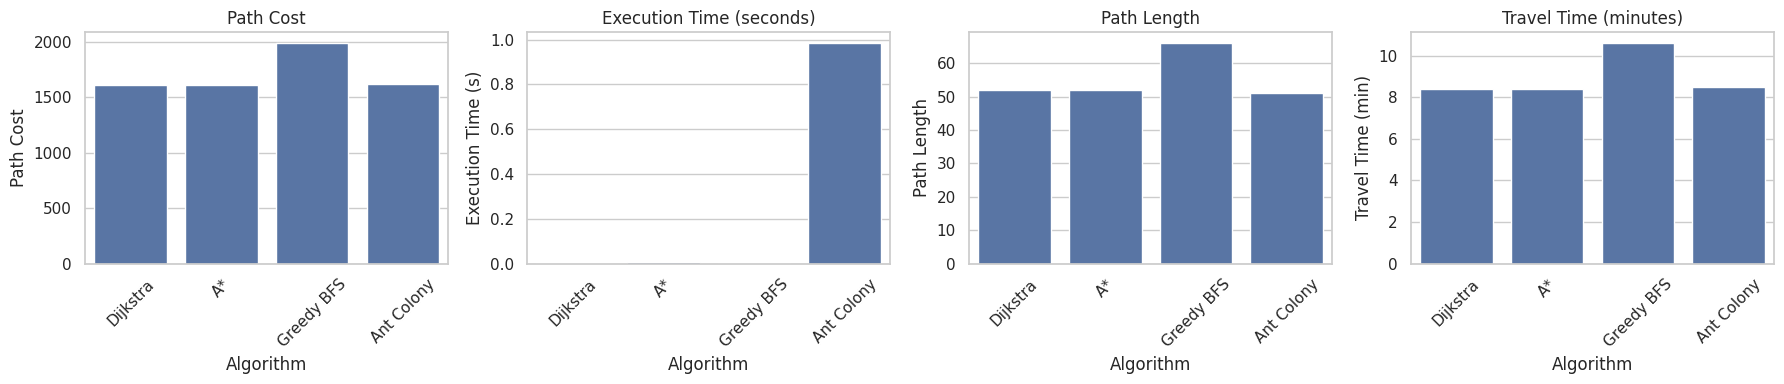


Visualizing paths with predicted costs...


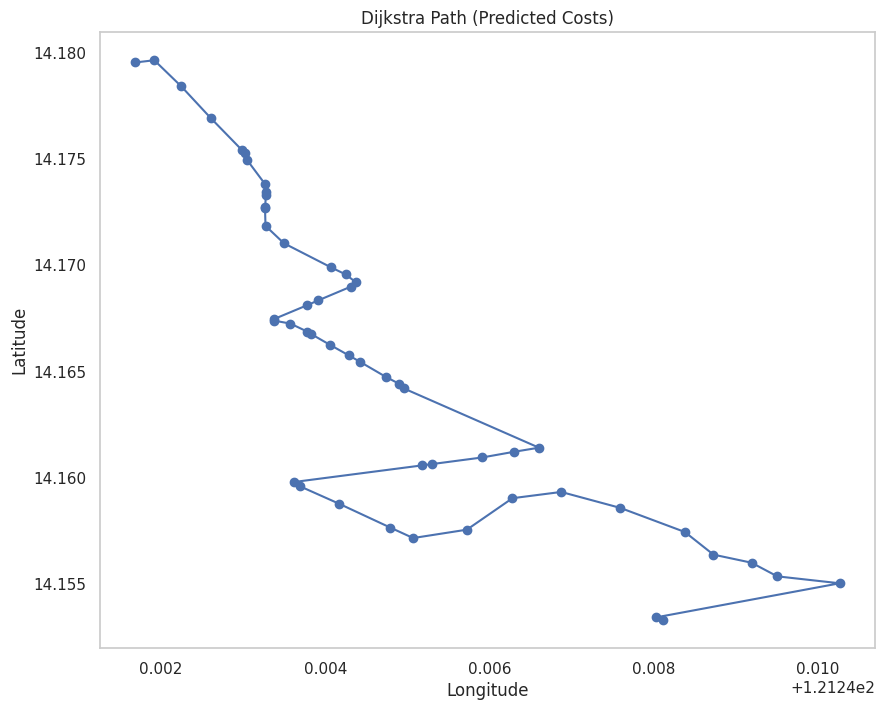

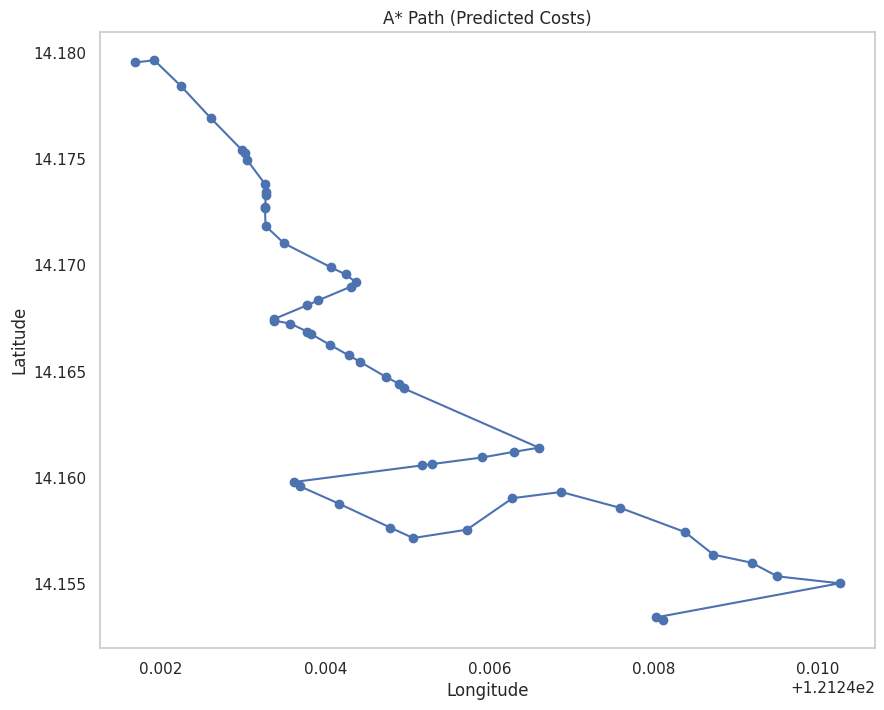

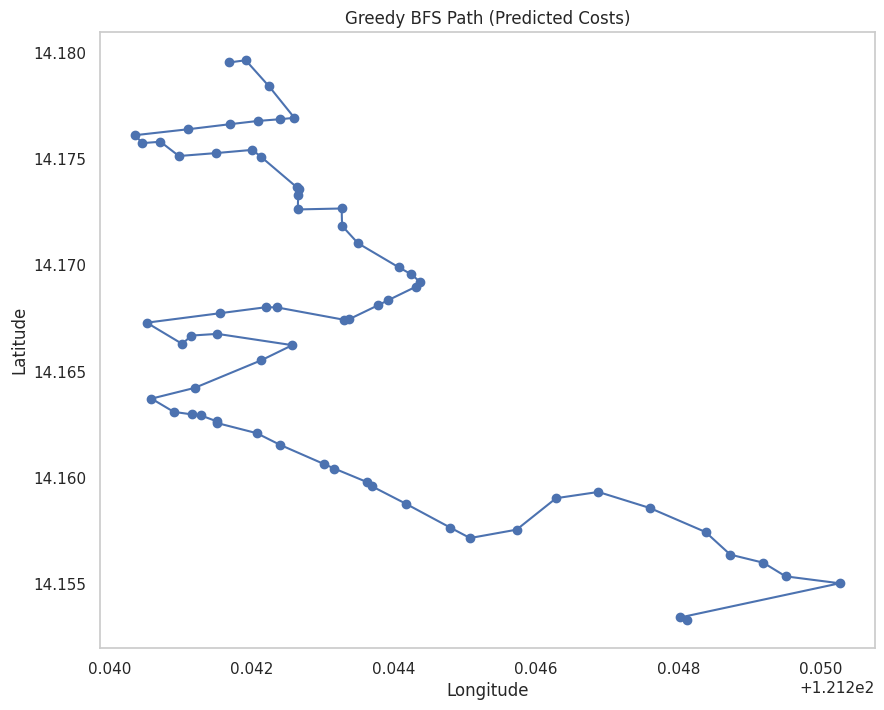

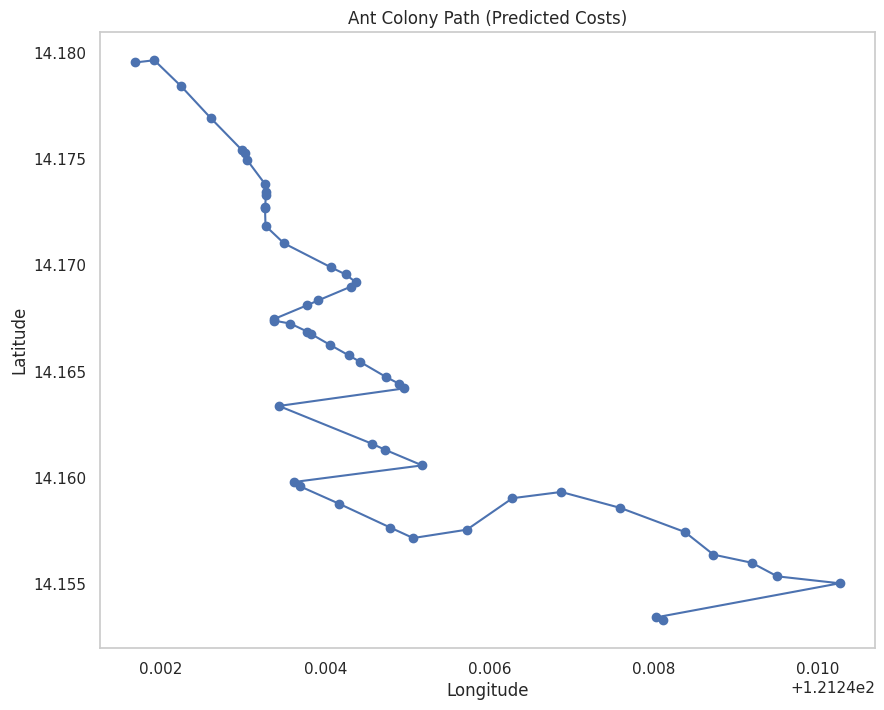

In [14]:
# -------------------------------
# Helper: parse coordinates safely
# -------------------------------
def parse_coords(node):
    if isinstance(node, str) and node.startswith("("):
        lat, lon = node.strip("()").split(",")
        return float(lat), float(lon)
    elif isinstance(node, (tuple, list)) and len(node) == 2:
        return node
    return (0.0, 0.0)

# -------------------------------
# Helper: Compute Travel Time (in minutes)
# -------------------------------
def compute_travel_time(G, path):
    if not path or len(path) < 2:
        return float("inf")  # no path found
    try:
        total_seconds = sum(G[u][v]["duration"] for u, v in zip(path[:-1], path[1:]))
        return total_seconds / 60  # convert to minutes
    except KeyError:
        return float("inf")  # invalid/broken path

# -------------------------------
# Select cost metric
# -------------------------------
def compute_edge_weight(row, mode="duration"):
    if mode == "duration":
        return row["duration_seconds"]
    elif mode == "distance":
        return row["distance_meters"]
    elif mode == "hybrid":
        return 0.7 * row["duration_seconds"] + 0.3 * row["distance_meters"]
    else:
        raise ValueError("Invalid cost metric. Use 'duration', 'distance', or 'hybrid'.")

# -------------------------------
# Build Graph
# -------------------------------
def build_graph(df, cost_mode="hybrid"):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        if not row.get("is_blocked", False):
            weight = compute_edge_weight(row, cost_mode)
            u, v = row["start_node"], row["end_node"]

            # Oneway vs. twoway edges
            if row["road_direction"] == 0:  # oneway
                G.add_edge(u, v,
                           weight=weight,
                           distance=row["distance_meters"],
                           duration=row["duration_seconds"],
                           is_blocked=row["is_blocked"])
            else:  # twoway
                G.add_edge(u, v, weight=weight,
                           distance=row["distance_meters"],
                           duration=row["duration_seconds"],
                           is_blocked=row["is_blocked"])
                G.add_edge(v, u, weight=weight,
                           distance=row["distance_meters"],
                           duration=row["duration_seconds"],
                           is_blocked=row["is_blocked"])
    return G

# -------------------------------
# Dynamic blocking/unblocking
# -------------------------------
def block_edge(G, u, v):
    if G.has_edge(u, v):
        G.remove_edge(u, v)

def unblock_edge(G, u, v, weight, distance, duration):
    G.add_edge(u, v,
               weight=weight,
               distance=distance,
               duration=duration,
               is_blocked=False)

# -------------------------------
# Heuristic Function
# -------------------------------
def heuristic(u, v):
    u_lat, u_lon = parse_coords(u)
    v_lat, v_lon = parse_coords(v)
    return sqrt((u_lat - v_lat) ** 2 + (u_lon - v_lon) ** 2)

# -------------------------------
# Optimized Algorithms
# -------------------------------
# ----------------Dijkstra's Algorithm---------------
def run_dijkstra(G, start, end):
    start_time = time.time()
    try:
        path = nx.shortest_path(G, source=start, target=end, weight="weight", method="dijkstra")
        total_cost = sum(G[u][v]["weight"] for u, v in zip(path[:-1], path[1:]))
    except (nx.NetworkXNoPath, nx.NodeNotFound):
        return None, float("inf"), time.time() - start_time
    return path, total_cost, time.time() - start_time

# ----------------A* Algorithm---------------
class AStarOptimizer:
    def __init__(self, G):
        self.G = G
        self.cache = {}   # dito i-store ang heuristic values

    def find_path(self, start, end):
        start_time = time.time()
        if end not in self.cache:
            self.cache[end] = {n: heuristic(n, end) for n in self.G.nodes()}
        try:
            path = nx.astar_path(
                self.G, start, end,
                heuristic=lambda u, v: self.cache[end][u],
                weight="weight"
            )
            total_cost = sum(self.G[u][v]["weight"] for u, v in zip(path[:-1], path[1:]))
        except (nx.NetworkXNoPath, nx.NodeNotFound):
            return None, float("inf"), time.time() - start_time
        return path, total_cost, time.time() - start_time

# ----------------Greedy Best-First Search---------------
class GreedyBFSOptimizer:
    def __init__(self, G):
        self.G = G

    def find_path(self, start, end):
        start_time = time.time()
        open_set = [(heuristic(start, end), start)]
        came_from = {}
        visited = set()

        while open_set:
            _, current = heapq.heappop(open_set)
            if current == end:
                # reconstruct path
                path = [current]
                while current in came_from:
                    current = came_from[current]
                    path.append(current)
                path.reverse()
                # Calculate actual cost considering blocked edges
                try:
                    cost = sum(self.G[u][v]["weight"] for u, v in zip(path[:-1], path[1:]))
                    return path, cost, time.time() - start_time
                except KeyError:
                    # Path contains blocked/invalid edges
                    return None, float("inf"), time.time() - start_time

            if current in visited:
                continue
            visited.add(current)

            for neighbor in self.G.neighbors(current):
                if neighbor not in visited:
                    # Check if edge is not blocked before considering it
                    if not self.G[current][neighbor].get('is_blocked', False):
                        came_from[neighbor] = current
                        heapq.heappush(open_set, (heuristic(neighbor, end), neighbor))

        return None, float("inf"), time.time() - start_time

# ----------------Ant Colony Optimization Algorithm---------------
class OptimizedAntColony:
    def __init__(self, graph, n_ants=20, n_iterations=100, decay=0.5, alpha=5, beta=10, gamma=10,
                 elitist_factor=2, stagnation_limit=15):
        # Use the original graph directly instead of creating a new one
        self.graph = graph
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.elitist_factor = elitist_factor
        self.stagnation_limit = stagnation_limit

        # Initialize pheromones only for existing edges
        self._initialize_pheromones()

        self.best_path = None
        self.best_cost = float('inf')
        self.stagnation_count = 0
        self.dead_end_nodes = set()

    def _initialize_pheromones(self):
        """Initialize pheromones for all edges in the graph"""
        self.pheromone = {}
        for u, v, d in self.graph.edges(data=True):
            if not d.get('is_blocked', False):
                # Use inverse of weight for initial pheromone
                self.pheromone[(u, v)] = 1 / max(0.1, d['weight'])
            else:
                # Very low pheromone for blocked edges
                self.pheromone[(u, v)] = 1e-10

    def _is_edge_blocked(self, u, v):
        """Check if an edge is blocked in the current graph"""
        try:
            return self.graph[u][v].get('is_blocked', False)
        except KeyError:
            return True  # Edge doesn't exist or is blocked

    def _get_edge_weight(self, u, v):
        """Get the current weight of an edge, considering blocking"""
        try:
            if self.graph[u][v].get('is_blocked', False):
                return float('inf')
            return self.graph[u][v]['weight']
        except KeyError:
            return float('inf')

    def _find_dead_end_nodes(self, end):
        """More efficient dead-end detection"""
        # Use BFS from end node to find reachable nodes
        reachable = set()
        queue = [end]  # Use list instead of deque

        while queue:
            node = queue.pop(0)  # pop from front (less efficient but works)
            if node in reachable:
                continue
            reachable.add(node)

            # Add all predecessors that can reach this node
            for pred in self.graph.predecessors(node):
                if (not self._is_edge_blocked(pred, node) and
                    pred not in reachable):
                    queue.append(pred)

        # Find dead ends: nodes that can't reach the end
        self.dead_end_nodes = set(self.graph.nodes()) - reachable

        # Also mark nodes that only lead to dead ends
        changed = True
        while changed:
            changed = False
            for node in set(self.graph.nodes()) - self.dead_end_nodes:
                # Check if all outgoing edges lead to dead ends or are blocked
                has_valid_exit = False
                for neighbor in self.graph.neighbors(node):
                    if (not self._is_edge_blocked(node, neighbor) and
                        neighbor not in self.dead_end_nodes):
                        has_valid_exit = True
                        break

                if not has_valid_exit and node != end:
                    self.dead_end_nodes.add(node)
                    changed = True

    def run(self, start, end, max_retries=3):
        start_time = time.time()

        # Update dead-end detection for current graph state
        self._find_dead_end_nodes(end)

        # Reset if previous best path is now invalid
        if self.best_path and not self._is_path_valid(self.best_path):
            self.best_path = None
            self.best_cost = float('inf')

        for retry in range(max_retries):
            found_valid_path = False

            for iteration in range(self.n_iterations):
                paths, costs = self._explore(start, end)

                if paths:  # Found at least one valid path
                    found_valid_path = True
                    self._update_best_solution(paths, costs)

                    # Early convergence check
                    if self.stagnation_count >= self.stagnation_limit:
                        break

                self._update_pheromones(paths, costs)

            if found_valid_path and self.best_path:
                exec_time = time.time() - start_time
                return self.best_path, self.best_cost, exec_time

            # If no path found, increase exploration
            self.alpha = max(1, self.alpha - 0.5)  # Reduce pheromone influence
            self.beta = min(20, self.beta + 1)     # Increase heuristic influence

        # Final attempt with relaxed parameters
        self._find_dead_end_nodes(end)
        paths, costs = self._explore(start, end)
        self._update_best_solution(paths, costs)

        exec_time = time.time() - start_time
        return self.best_path, self.best_cost, exec_time

    def _is_path_valid(self, path):
        """Check if a path is still valid with current graph state"""
        if not path or len(path) < 2:
            return False

        for u, v in zip(path[:-1], path[1:]):
            if self._is_edge_blocked(u, v):
                return False
        return True

    def _reset_pheromones(self):
        """Reset pheromone levels to initial state."""
        for u, v, d in self.graph.edges(data=True):
            self.pheromone[(u, v)] = 1 / max(0.1, d['weight'])
            if not isinstance(self.graph, nx.DiGraph):
                self.pheromone[(v, u)] = self.pheromone[(u, v)]
        self.best_path = None
        self.best_cost = float('inf')
        self.stagnation_count = 0

    def _explore(self, start, end):
        paths, costs = [], []
        for _ in range(self.n_ants):
            path = self._construct_path(start, end)
            if path and path[-1] == end:
                cost = sum(self.graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
                paths.append(path)
                costs.append(cost)
        return paths, costs

    def _construct_path(self, start, end):
      path = [start]
      current = start
      visited = set([start])
      max_steps = 100  # Prevent infinite loops

      for step in range(max_steps):
          if current == end:
              return path

          # Get all possible next nodes that aren't blocked
          neighbors = []
          for neighbor in self.graph.neighbors(current):
              # Skip if edge is blocked or already visited
              if (not self._is_edge_blocked(current, neighbor) and
                  neighbor not in visited and
                  neighbor not in self.dead_end_nodes):
                  neighbors.append(neighbor)

          if not neighbors:
              # No valid neighbors, backtrack
              if len(path) > 1:
                  path.pop()
                  current = path[-1]
                  continue
              else:
                  return None  # No path found

          # Select next node using ACO probability
          next_node = self._select_next_node(current, neighbors, end)
          if next_node is None:
              return None

          path.append(next_node)
          visited.add(next_node)
          current = next_node

      return None  # Exceeded max steps

    def _select_next_node(self, current, unvisited, end):
        if not unvisited:
            return None

        epsilon = 1e-10
        probabilities = []

        for neighbor in unvisited:
            # Skip blocked edges
            if self._is_edge_blocked(current, neighbor):
                continue

            # Get pheromone level
            pheromone_level = self.pheromone.get((current, neighbor), 1e-10)

            # Calculate heuristic (distance to goal)
            dist_to_goal = heuristic(neighbor, end)

            # Apply gamma to scale the heuristic importance
            heuristic_value = 1.0 / (dist_to_goal + epsilon)  # Convert to "attractiveness"
            scaled_heuristic = heuristic_value ** self.gamma

            # Calculate probability using all three parameters
            prob = (pheromone_level ** self.alpha) * (scaled_heuristic ** self.beta)
            probabilities.append((neighbor, prob))

        if not probabilities:
            return None

        # Normalize probabilities
        nodes, probs = zip(*probabilities)
        total_prob = sum(probs)

        if total_prob <= 0:
            # If all probabilities are zero, use uniform distribution
            return random.choice(nodes)

        normalized_probs = [p / total_prob for p in probs]

        # Select next node based on probabilities
        return np.random.choice(nodes, p=normalized_probs)

    def _update_best_solution(self, paths, costs):
        if costs and min(costs) < self.best_cost:
            idx = np.argmin(costs)
            self.best_path = paths[idx]
            self.best_cost = costs[idx]
            self.stagnation_count = 0
        else:
            self.stagnation_count += 1

    def _update_pheromones(self, paths, costs):
        for edge in self.pheromone:
            self.pheromone[edge] *= self.decay
        for path, cost in zip(paths, costs):
            deposit = 1 / max(0.1, cost)
            for u, v in zip(path[:-1], path[1:]):
                self.pheromone[(u, v)] += deposit
                if not isinstance(self.graph, nx.DiGraph):
                    self.pheromone[(v, u)] += deposit
        if self.best_path and self.best_cost < float('inf'):
            elite_deposit = self.elitist_factor / max(0.1, self.best_cost)
            for u, v in zip(self.best_path[:-1], self.best_path[1:]):
                self.pheromone[(u, v)] += elite_deposit
                if not isinstance(self.graph, nx.DiGraph):
                    self.pheromone[(v, u)] += elite_deposit

# -------------------------------
# Example Run
# -------------------------------
# Build graph (choose: duration / distance / hybrid)
G = build_graph(df, cost_mode="hybrid")

start_node = "(14.153306, 121.248118)"
end_node = "(14.179543, 121.241683)"

# Run all algorithms
astar = AStarOptimizer(G)
greedy = GreedyBFSOptimizer(G)
ant_colony = OptimizedAntColony(G, n_ants=20, n_iterations=100, decay=0.5, alpha=1, beta=3, gamma=10,
                                elitist_factor=2, stagnation_limit=15)

d_path, d_cost, d_time = run_dijkstra(G, start_node, end_node)
a_path, a_cost, a_time = astar.find_path(start_node, end_node)
g_path, g_cost, g_time = greedy.find_path(start_node, end_node)
ant_path, ant_cost, ant_time = ant_colony.run(start_node, end_node)

# Calculate travel time in minutes
d_time_total = compute_travel_time(G, d_path)
a_time_total = compute_travel_time(G, a_path)
g_time_total = compute_travel_time(G, g_path)
ant_time_total = compute_travel_time(G, ant_path)

# Collect metrics
metrics = [
    ("Dijkstra", d_cost, d_time, len(d_path) if d_path else 0, d_time_total),
    ("A*", a_cost, a_time, len(a_path) if a_path else 0, a_time_total),
    ("Greedy BFS", g_cost, g_time, len(g_path) if g_path else 0, g_time_total),
    ("Ant Colony", ant_cost, ant_time, len(ant_path) if ant_path else 0, ant_time_total)
]

metrics_df = pd.DataFrame(metrics, columns=["Algorithm", "Path Cost", "Execution Time (s)", "Path Length", "Travel Time (min)"])
print(metrics_df)

# Plot comparison (Travel Time in minutes)
plt.figure(figsize=(18, 4))

plt.subplot(1, 4, 1)
sns.barplot(data=metrics_df, x="Algorithm", y="Path Cost")
plt.xticks(rotation=45)
plt.title("Path Cost")
plt.subplot(1, 4, 2)
sns.barplot(data=metrics_df, x="Algorithm", y="Execution Time (s)")
plt.xticks(rotation=45)
plt.title("Execution Time (seconds)")
plt.subplot(1, 4, 3)
sns.barplot(data=metrics_df, x="Algorithm", y="Path Length")
plt.xticks(rotation=45)
plt.title("Path Length")
plt.subplot(1, 4, 4)
sns.barplot(data=metrics_df, x="Algorithm", y="Travel Time (min)")
plt.xticks(rotation=45)
plt.title("Travel Time (minutes)")
plt.tight_layout()
plt.show()

# Path visualization function
def plot_path(path, title):
    if not path:
        print(f"[Warning] No path found for {title}")
        return
    coords = [parse_coords(node) for node in path]
    plt.figure(figsize=(10, 8))
    plt.plot([c[1] for c in coords], [c[0] for c in coords], 'o-', markersize=6)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

# Plot each algorithm's path
print("\nVisualizing paths with predicted costs...")
plot_path(d_path, "Dijkstra Path (Predicted Costs)")
plot_path(a_path, "A* Path (Predicted Costs)")
plot_path(g_path, "Greedy BFS Path (Predicted Costs)")
plot_path(ant_path, "Ant Colony Path (Predicted Costs)")

Running initial algorithm comparison...
    Algorithm  Path Cost  Execution Time (s)  Path Length  Travel Time (min)
0    Dijkstra   1611.240            0.003364           52           8.420000
1          A*   1611.240            0.005372           52           8.420000
2  Greedy BFS   1987.044            0.000417           66          10.596286
3  Ant Colony   1621.224            1.024074           51           8.472000

STARTING DISCRETE EVENT SIMULATION
Starting simulation with dynamic events...

Initial state at time 0:
Blocked edges: []
Dijkstra: SUCCESS | Cost: 1611.24 | Time: 0.0036s | Nodes: 52
A*: SUCCESS | Cost: 1611.24 | Time: 0.0054s | Nodes: 52
Greedy BFS: SUCCESS | Cost: 1987.04 | Time: 0.0004s | Nodes: 66
Ant Colony: SUCCESS | Cost: 1611.24 | Time: 0.9227s | Nodes: 52

Time 5: Handling block event on edges [('(14.161556, 121.242401)', '(14.162106, 121.242072)')]
Blocked edge: (14.161556, 121.242401) -> (14.162106, 121.242072)
Current blocked edges: [('(14.161556, 121.242

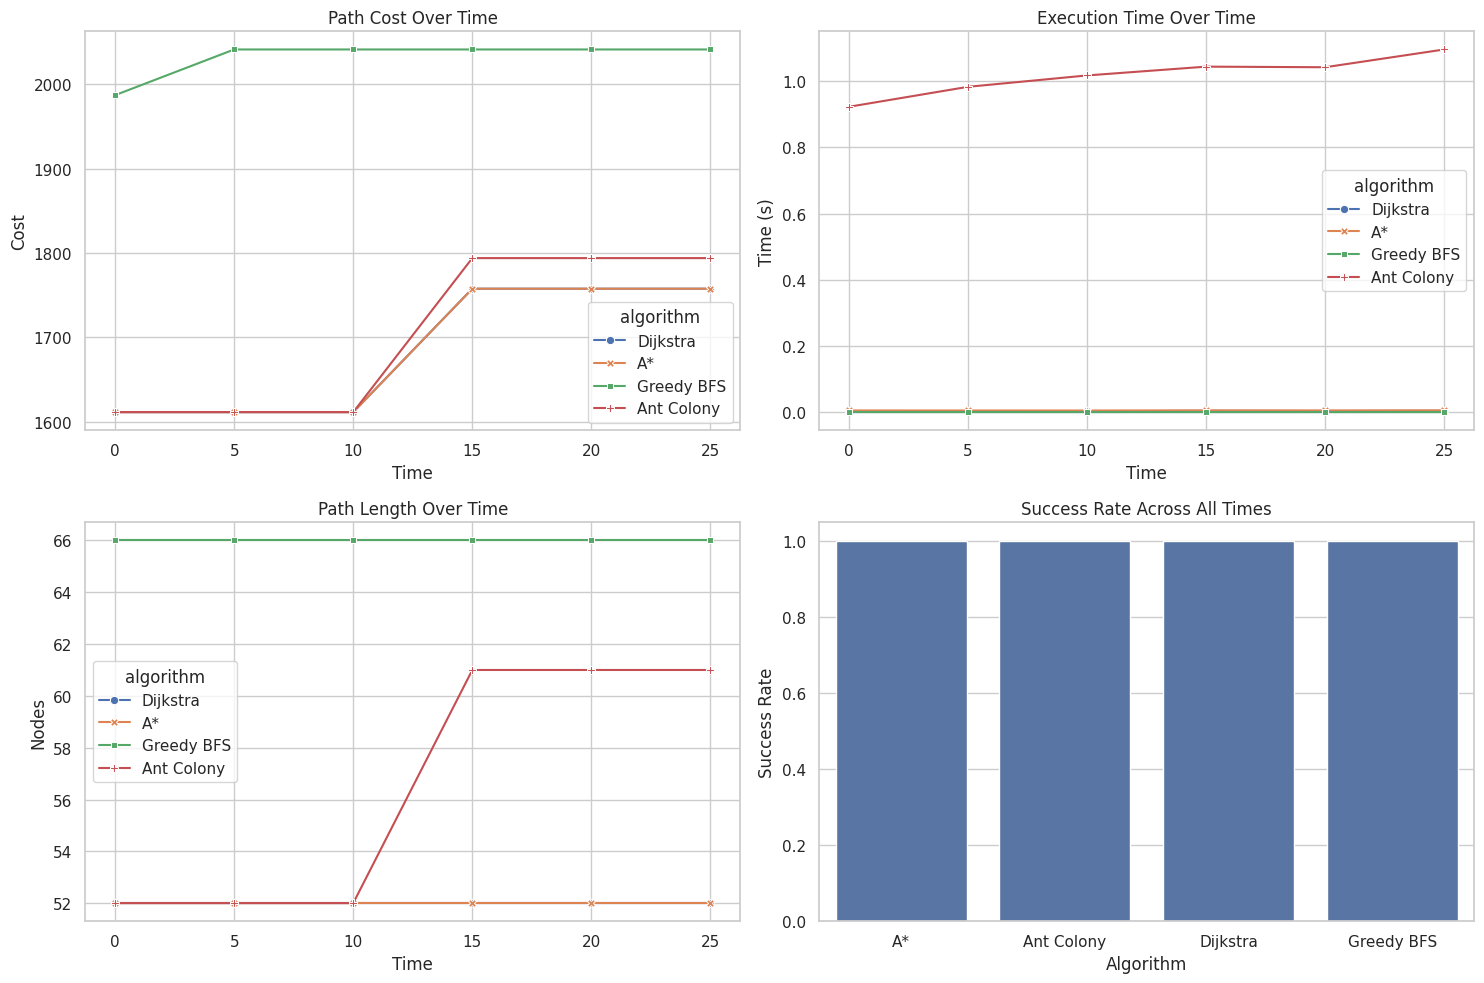


Final results at time 25:


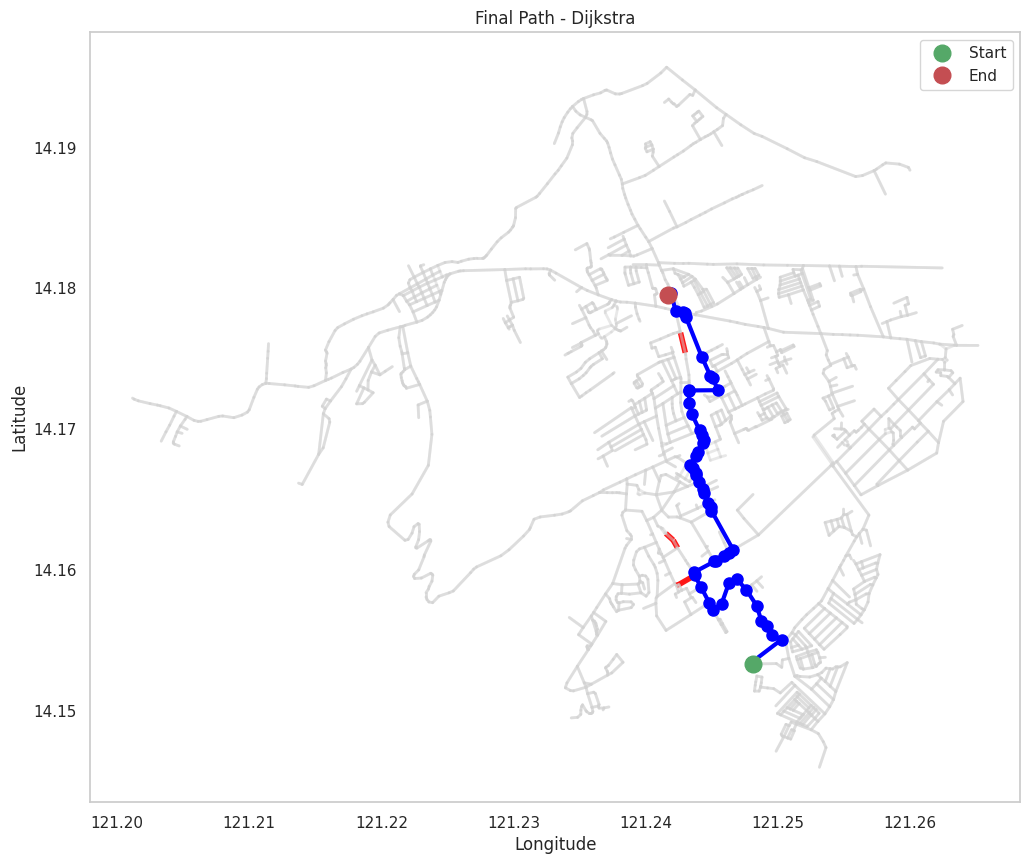

Dijkstra: Path found with 52 nodes


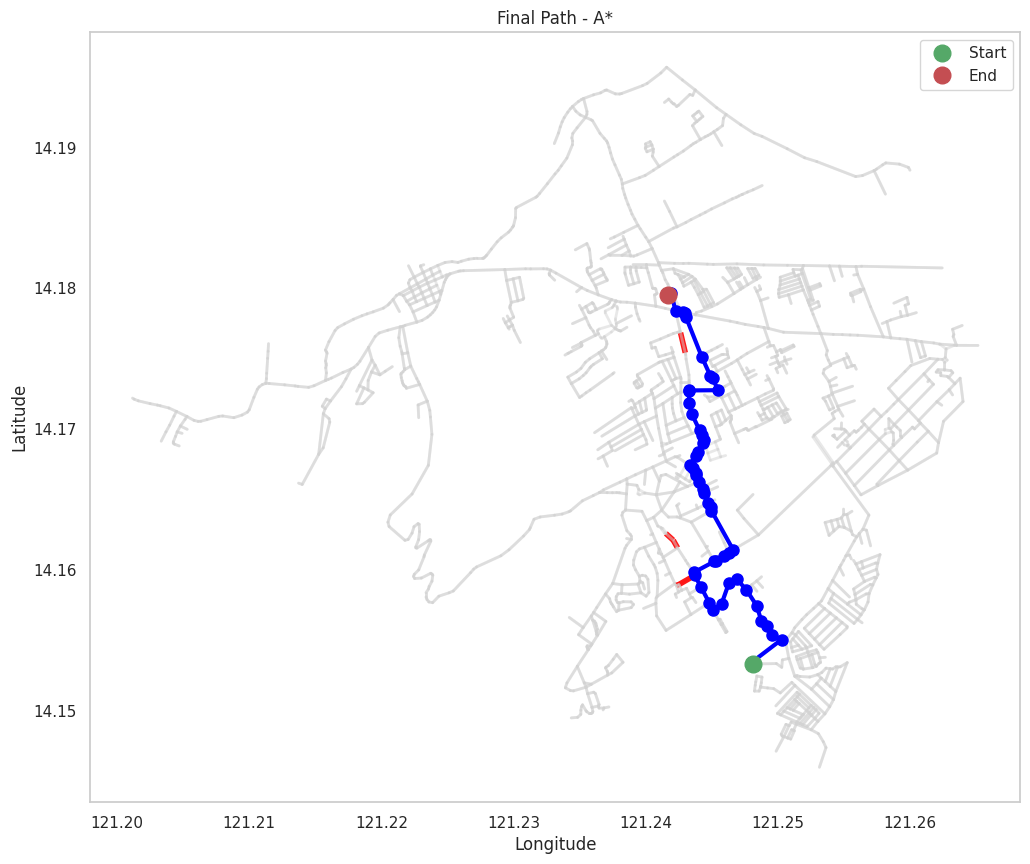

A*: Path found with 52 nodes


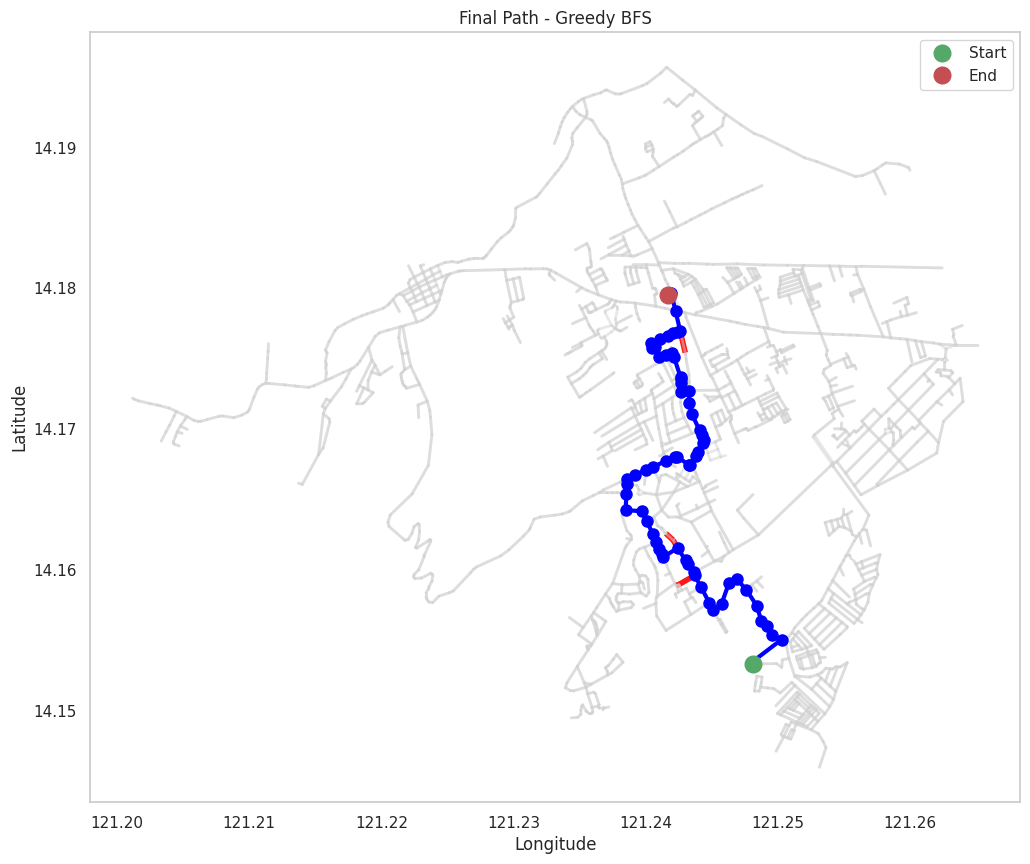

Greedy BFS: Path found with 66 nodes


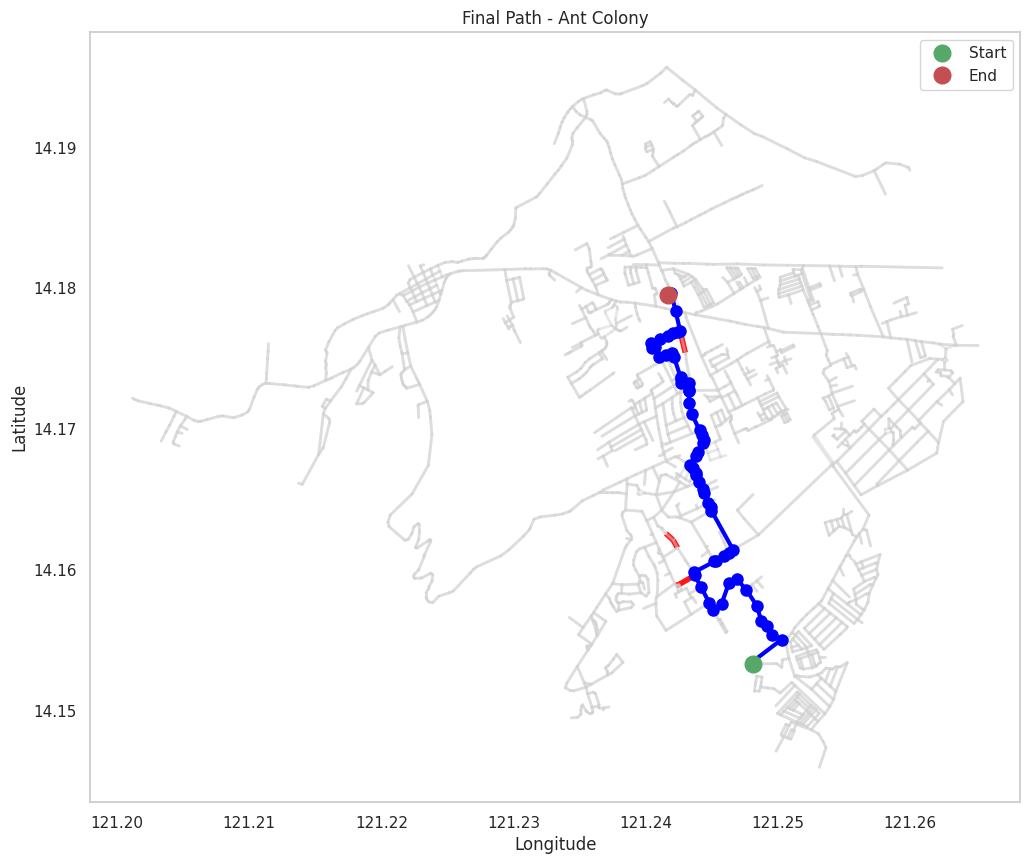

Ant Colony: Path found with 61 nodes


In [15]:
# ====================== EVENT SIMULATION CLASSES ======================

class Event:
    """Event class for discrete event simulation"""
    def __init__(self, time, event_type, data=None):
        self.time = time
        self.event_type = event_type
        self.data = data

    def __lt__(self, other):
        return self.time < other.time

def handle_event(event, graph):
    """Handle events that modify the graph"""
    if event.event_type == "block":
        for u, v in event.data["edges"]:
            if graph.has_edge(u, v):
                # Store original weight if not already stored
                if 'original_weight' not in graph[u][v]:
                    graph[u][v]['original_weight'] = graph[u][v]['weight']
                # Set weight to infinity to make it impassable
                graph[u][v]['weight'] = float('inf')
                graph[u][v]['is_blocked'] = True
                print(f"Blocked edge: {u} -> {v}")

    elif event.event_type == "unblock":
        for u, v in event.data["edges"]:
            if graph.has_edge(u, v):
                # Restore original weight if available
                if 'original_weight' in graph[u][v]:
                    graph[u][v]['weight'] = graph[u][v]['original_weight']
                graph[u][v]['is_blocked'] = False
                print(f"Unblocked edge: {u} -> {v}")

def evaluate_algorithms(graph, start, end, current_time):
    """Evaluate all pathfinding algorithms at a given time"""
    # Initialize algorithm objects
    astar = AStarOptimizer(graph)
    greedy = GreedyBFSOptimizer(graph)
    ant_colony = OptimizedAntColony(graph, n_ants=20, n_iterations=100, decay=0.5, alpha=1, beta=3, gamma=10,
                                    elitist_factor=2, stagnation_limit=15)

    algorithms = {
        'Dijkstra': lambda: run_dijkstra(graph, start, end),
        'A*': lambda: astar.find_path(start, end),
        'Greedy BFS': lambda: greedy.find_path(start, end),
        'Ant Colony': lambda: ant_colony.run(start, end)
    }

    results = []

    for name, algorithm in algorithms.items():
        path, cost, exec_time = algorithm()

        result = {
            'time': current_time,
            'algorithm': name,
            'path_length': len(path) if path else 0,
            'cost': cost,
            'execution_time': exec_time,
            'path_found': path is not None
        }
        results.append(result)

        status = "SUCCESS" if path else "FAILED"
        print(f"{name}: {status} | Cost: {cost:.2f} | Time: {exec_time:.4f}s | Nodes: {len(path) if path else 0}")

    return results

def run_simulation(graph, events, start_node, end_node, max_time=100):
    """Run the discrete event simulation with all algorithms"""
    current_time = 0
    heapq.heapify(events)

    # Initialize results storage
    results = []

    # Initial state
    initial_blocked = [(u, v) for u, v, d in graph.edges(data=True) if d.get('is_blocked', False)]
    print(f"\nInitial state at time {current_time}:")
    print(f"Blocked edges: {initial_blocked}")

    # Run initial pathfinding with all algorithms
    initial_results = evaluate_algorithms(graph, start_node, end_node, current_time)
    results.extend(initial_results)

    # Event loop
    while events and current_time <= max_time:
        event = heapq.heappop(events)
        current_time = event.time

        print(f"\nTime {current_time}: Handling {event.event_type} event on edges {event.data['edges']}")
        handle_event(event, graph)

        # Get current blocked edges
        blocked_edges = [(u, v) for u, v, d in graph.edges(data=True) if d.get('is_blocked', False)]
        print(f"Current blocked edges: {blocked_edges}")

        # Evaluate all algorithms after event
        event_results = evaluate_algorithms(graph, start_node, end_node, current_time)
        results.extend(event_results)

    return pd.DataFrame(results)

# ====================== VISUALIZATION FUNCTIONS ======================

def plot_metrics(results_df):
    """Plot performance metrics over time"""
    plt.figure(figsize=(15, 10))

    # Cost comparison
    plt.subplot(2, 2, 1)
    sns.lineplot(data=results_df, x='time', y='cost', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Path Cost Over Time')
    plt.ylabel('Cost')
    plt.xlabel('Time')

    # Execution time comparison
    plt.subplot(2, 2, 2)
    sns.lineplot(data=results_df, x='time', y='execution_time', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Execution Time Over Time')
    plt.ylabel('Time (s)')
    plt.xlabel('Time')

    # Path length comparison
    plt.subplot(2, 2, 3)
    sns.lineplot(data=results_df, x='time', y='path_length', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Path Length Over Time')
    plt.ylabel('Nodes')
    plt.xlabel('Time')

    # Success rate
    plt.subplot(2, 2, 4)
    success_rates = results_df.groupby('algorithm')['path_found'].mean().reset_index()
    sns.barplot(data=success_rates, x='algorithm', y='path_found')
    plt.title('Success Rate Across All Times')
    plt.ylabel('Success Rate')
    plt.xlabel('Algorithm')

    plt.tight_layout()
    plt.show()

def plot_path_with_blocked(path, title, graph):
    """Visualize a path on the graph with blocked edges highlighted"""
    if not path:
        print(f"No path to visualize for {title}")
        return

    coords = [parse_coords(node) for node in path]
    plt.figure(figsize=(12, 10))

    # Plot all edges first
    for u, v, d in graph.edges(data=True):
        u_coords = parse_coords(u)
        v_coords = parse_coords(v)
        if d.get('is_blocked', False):
            # Bright red for blocked edges with thicker line
            plt.plot([u_coords[1], v_coords[1]], [u_coords[0], v_coords[0]],
                    color='red', alpha=0.9, linewidth=4, linestyle='--')
        else:
            # Light gray for normal edges
            plt.plot([u_coords[1], v_coords[1]], [u_coords[0], v_coords[0]],
                    color='lightgray', alpha=0.5, linewidth=2)

    # Plot the path on top
    path_coords = [parse_coords(node) for node in path]
    plt.plot([c[1] for c in path_coords], [c[0] for c in path_coords], 'o-', color='blue', linewidth=3, markersize=8)

    # Add start and end markers
    start_coords = parse_coords(path[0])
    end_coords = parse_coords(path[-1])
    plt.plot(start_coords[1], start_coords[0], 'go', markersize=12, label='Start')
    plt.plot(end_coords[1], end_coords[0], 'ro', markersize=12, label='End')

    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid()
    plt.show()

# ====================== MAIN SIMULATION ======================

def main_simulation():
    """Run the main simulation with predefined events"""
    # Build graph (choose: duration / distance / hybrid)
    G = build_graph(df, cost_mode="hybrid")

    start_node = "(14.153306, 121.248118)"
    end_node = "(14.179543, 121.241683)"

    # Create event queue with specific blocking/unblocking events
    event_queue = [
        Event(5, "block", {"edges": [('(14.161556, 121.242401)', '(14.162106, 121.242072)')]}),
        Event(10, "block", {"edges": [('(14.162106, 121.242072)', '(14.162584, 121.241514)')]}),
        Event(15, "block", {"edges": [('(14.175426, 121.242984)', '(14.176939, 121.242602)')]}),
        Event(20, "block", {"edges": [('(14.158896, 121.242306)', '(14.158954, 121.242507)')]}),
        Event(25, "block", {"edges": [('(14.158954, 121.242507)', '(14.159600, 121.243696)')]})
    ]

    print("Starting simulation with dynamic events...")

    # Run simulation
    results_df = run_simulation(G, event_queue, start_node, end_node, max_time=30)

    # Plot metrics
    plot_metrics(results_df)

    # Show final paths from each algorithm
    final_time = results_df['time'].max()
    final_results = results_df[results_df['time'] == final_time]

    print(f"\nFinal results at time {final_time}:")
    for _, row in final_results.iterrows():
        if row['path_found']:
            # Get the actual path found by the algorithm
            if row['algorithm'] == 'Dijkstra':
                path, _, _ = run_dijkstra(G, start_node, end_node)
            elif row['algorithm'] == 'A*':
                astar = AStarOptimizer(G)
                path, _, _ = astar.find_path(start_node, end_node)
            elif row['algorithm'] == 'Greedy BFS':
                greedy = GreedyBFSOptimizer(G)
                path, _, _ = greedy.find_path(start_node, end_node)
            elif row['algorithm'] == 'Ant Colony':
                ant_colony = OptimizedAntColony(G, n_ants=20, n_iterations=100, decay=0.5, alpha=1, beta=3, gamma=10,
                                    elitist_factor=2, stagnation_limit=15)
                path, _, _ = ant_colony.run(start_node, end_node)
            else:
                path = None

            if path:
                plot_path_with_blocked(path, f"Final Path - {row['algorithm']}", G)
                print(f"{row['algorithm']}: Path found with {len(path)} nodes")
            else:
                print(f"{row['algorithm']}: No path found")
        else:
            print(f"{row['algorithm']}: No path found at final state")

    return results_df

# ====================== RUN THE SIMULATION ======================

# Add this after your existing code to run the simulation
if __name__ == "__main__":
    # Run your existing algorithms first
    print("Running initial algorithm comparison...")

    # Your existing algorithm comparison code here
    G = build_graph(df, cost_mode="hybrid")
    start_node = "(14.153306, 121.248118)"
    end_node = "(14.179543, 121.241683)"

    astar = AStarOptimizer(G)
    greedy = GreedyBFSOptimizer(G)
    ant_colony = OptimizedAntColony(G, n_ants=20, n_iterations=100, decay=0.5, alpha=1, beta=3, gamma=10,
                                    elitist_factor=2, stagnation_limit=15)

    d_path, d_cost, d_time = run_dijkstra(G, start_node, end_node)
    a_path, a_cost, a_time = astar.find_path(start_node, end_node)
    g_path, g_cost, g_time = greedy.find_path(start_node, end_node)
    ant_path, ant_cost, ant_time = ant_colony.run(start_node, end_node)

    # Calculate travel time in minutes
    d_time_total = compute_travel_time(G, d_path)
    a_time_total = compute_travel_time(G, a_path)
    g_time_total = compute_travel_time(G, g_path)
    ant_time_total = compute_travel_time(G, ant_path)

    # Collect metrics
    metrics = [
        ("Dijkstra", d_cost, d_time, len(d_path) if d_path else 0, d_time_total),
        ("A*", a_cost, a_time, len(a_path) if a_path else 0, a_time_total),
        ("Greedy BFS", g_cost, g_time, len(g_path) if g_path else 0, g_time_total),
        ("Ant Colony", ant_cost, ant_time, len(ant_path) if ant_path else 0, ant_time_total)
    ]

    metrics_df = pd.DataFrame(metrics, columns=["Algorithm", "Path Cost", "Execution Time (s)", "Path Length", "Travel Time (min)"])
    print(metrics_df)

    # Then run the simulation
    print("\n" + "="*50)
    print("STARTING DISCRETE EVENT SIMULATION")
    print("="*50)

    simulation_results = main_simulation()